# OPTIM - Homework 2 
### Programming Gradient Methods


#### Fatemeh CHANGIZIAN, Aydin ABIAR

# Problem 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

We want to implement **Gradient Descent algorithm** to minimise the function below

$$f(x_1, x_2, ..., x_m)= \sum_{i=1}^{m} a_i\cdot(x_i-b_i)^2 \ + 3$$

To compute Gradient Descent:
$$\frac{\partial \mathcal{f}}{\partial x_i}= 2 a_i (x_i - b_i) $$

Here, we can simply solve the minimization problem and find the optimal value of $f$. By imposing $\frac{\partial \mathcal{f}}{\partial x_i} = 0$, we get for $a_i \neq 0$: 

$$ 2 a_i (x_i - b_i) = 0 \Leftrightarrow \forall i,  x_i^*=b_i \text{ or } a_i = 0 \quad $$

$$ \Leftrightarrow  f (x^*)=3$$
$$$$
So, our optimal value equal to **3** and we will use this value to evaluate the optimisation algorithms.

This problem is actually a **Quadratic** problem which can be shown in a matrix form: $f(x)= (x-b)^T\cdot A\cdot(x-b) + 3$. The **Hessian** matrix is **2A** with value $2 a_i$ on diagonal and 0 otherwise. It can be computed as follows:

$$ \frac{\partial^2 \mathcal{f}}{\partial x_i^2}= 2 a_i$$

Notice that since the matrix is diagonal, the eigenvalues are simply the elements on the diagonal.
Consider $a_i > 0 \: \forall i$

There is a Lipschitz constant such as $L =\lambda_{max}=max (2 a_i)$ 
$$$$
There is a strong convexity with parameter $M=\lambda_{min}=min(2 a_i)$ 


# Stop Criterion:

We choose $\epsilon = 10^{-6}$ and we know that the gradient descent finds an ε-suboptimal point in $O(\frac{L}{m}log(1/ε))$ iterations, so, the maximum number of iterations is $\frac{L}{m}log(1/ε) = 10^{6}$. 

___
We choose two stop criterion for the algorithm:
1. if $|| \nabla f(x(k))||_2 < \epsilon \implies$ algorithm stops at iteration k.
2. if we reach the maximum number of iteration $\implies$ algorithm stops at iteration k=max_iter.

In [6]:
f = lambda x,a,b: np.sum(a*((x-b)**2))+3

grad_f = lambda x,a,b: 2*a*(x-b)

f_opt=3

## 1) Gradient descent algorithm

In [7]:
def GD_fixt(x0, grad, fun, t, eps=1e-6, max_iter=1000000):
    x=np.ones(x0.size, dtype=np.float64)
    g=np.ones(x0.size, dtype=np.float64)
    f=np.ones(max_iter, dtype=np.float64)

    x=x0.copy()
    
    for k in range(max_iter-1):
        g=grad(x)
        f[k]=fun(x)
        
        if np.linalg.norm(g, 2) < eps: #stop criterion 1
            print("converged after %d iterations" % k)
            break
        
        x=x-t*g
        
    else: #stop criterion 2
        k=max_iter-1
        f[k]=fun(x)

        print("stopped since reached max_iter")
        
    return x, f[:k+1]

## 2) Gradient descent algorithm with backtracking

Parameters $0 < \beta < 1$ and $0 < \alpha \le 1/2$
$$$$
At each iteration  , start with $t = t_{init}$, and shrink $t = \beta   t$.

In [8]:
def GD_bt(x0, grad, fun, t_init, alpha=0.5, beta=0.5, eps=1e-6, max_iter=1000000):
    x=np.ones(x0.size, dtype=np.float64)
    g=np.ones(x0.size, dtype=np.float64)
    f=np.ones(max_iter, dtype=np.float64)

    x=x0.copy()
    t=t_init
    
    for k in range(max_iter-1):
        g=grad(x)
        f[k]=fun(x)
        
        norm_g=np.linalg.norm(g, 2)
        if  norm_g < eps: #stop criterion 1
            print("converged after %d iterations" % k)
            break
            
        m=alpha*(norm_g**2)
        while fun(x-t*g) > f[k]-t*m:
            t*=beta
            
        x=x-t*g
        
    else: #stop criterion 2
        k=max_iter-1
        f[k]=fun(x)
        print("stopped since reached max_iter")
        
    return x, f[:k+1]

## 3) Assume $m = 500$, $a_i = 1$ and $b_i$ is chosen randomly and uniformly in $[0, 100]$.

We have:
$$$$
By Lipschitz continuity $L =\lambda_{max}=max (2 a_i)$ 
$$$$
By strongly convexity $m=\lambda_{min}=min(2 a_i)$ 
$$$$
So here, $a_i = 1 \implies L=m=2$

In [9]:
np.random.seed(0) # makes the random numbers predictable set means the same set of numbers will appear every time.

In [10]:
m=500
a=np.ones(m) #a_i = 1
b=np.random.randint(101, size=m)
x0=np.zeros(m) # with initial point xi = 0; for all i.


The maximum step size taken is $t_{max} = \frac{2}{m+L}=0.5$

fixed t=0.40		converged after 14 iterations
fixed t=0.50		converged after 1 iterations
backtracking t_init=1.00	converged after 1 iterations
backtracking t_init=10.00	converged after 23 iterations
fixed t=0.40		converged after 14 iterations
fixed t=0.50		converged after 1 iterations
backtracking t_init=1.00	converged after 1 iterations
backtracking t_init=10.00	converged after 23 iterations


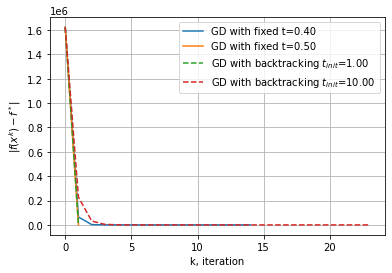

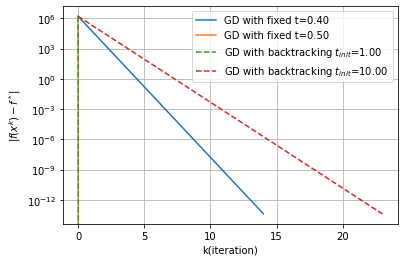

In [11]:
t_max=0.5
t_s=[0.4, 0.5] # fixed step size for GD
t_init_s=[1, 10] # initial step size for GD with backtracking

plt.figure(1)
for t in t_s:
    print("fixed t=%.2f\t\t"%t, end='')
    x_fixt,f_fixt=GD_fixt(x0, lambda x: grad_f(x,a,b),lambda x: f(x,a,b), t)
    plt.plot(np.abs(f_fixt-f_opt))
    
    
for t_init in t_init_s:
    print("backtracking t_init=%.2f\t"%t_init, end='')
    x_bkt,f_bkt=GD_bt(x0, lambda x: grad_f(x,a,b), lambda x: f(x,a,b), t_init)
    plt.plot(np.abs(f_bkt-f_opt), '--')
    plt.ylabel("$|f(x^{k}) - f^*|$")
    
plt.xlabel("k, iteration")
plt.legend(["GD with fixed t=%.2f" % t for t in t_s] +["GD with backtracking $t_{init}$=%.2f" % t_init for t_init in t_init_s]);
plt.grid()
    
plt.figure(2)
for t in t_s:
    print("fixed t=%.2f\t\t"%t, end='')
    x_fixt,f_fixt=GD_fixt(x0, lambda x: grad_f(x,a,b),lambda x: f(x,a,b), t)
    plt.semilogy(np.abs(f_fixt-f_opt))
    
    
for t_init in t_init_s:
    print("backtracking t_init=%.2f\t"%t_init, end='')
    x_bkt,f_bkt=GD_bt(x0, lambda x: grad_f(x,a,b), lambda x: f(x,a,b), t_init)
    plt.semilogy(np.abs(f_bkt-f_opt), '--')    

plt.ylabel("$|f(x^{k}) - f^*|$")
plt.xlabel("k(iteration)")
plt.legend(["GD with fixed t=%.2f" % t for t in t_s] +["GD with backtracking $t_{init}$=%.2f" % t_init for t_init in t_init_s]);
plt.grid()

### Gradient Descent with fixed step size

Recalling from above that the function is **Lipschitz continuity and stongly convex** with $L=\lambda_{max}=2$ and $m=\lambda_{min}=2$, we can choose the step size to guarantee exponential convergence $O(\frac{L}{m}log(1/\epsilon))$ as follows:

$$
t\le \frac{2}{m+L}=0.5
$$

According to the above results, for **t=0.5** the GD algorithm converges after only **one iteration**.

### Gradient Descent with backtracking
In this case we start from size $t = t_{init}$, and shrink $t = \beta\cdot t$ in each iteration so,the choice of $t$ is much less critical, since the algorithm is able to diminish it. From the plot we can notice that the convergence is still exponential, similar to the gradient descent with fixed step size.

## 4) Assume $m = 500$, $a_i$ and $b_i$ is chosen randomly and uniformly in $[1, 100]$.

We remember from above that the function is Lipschitz and stongly convex:
$$$$
By Lipschitz continuity $L =\lambda_{max}=max (2 a_i)$ 
$$$$
By strongly convexity $m=\lambda_{min}=min(2 a_i)$ 
$$$$
So here, $a_i$ is random value in $[1; 100]$ $\implies L=200 \quad and \quad m=2$

In [292]:
np.random.seed(2) # makes the random numbers predictable set means the same set of numbers will appear every time.

In [12]:
m=500
a=np.random.randint(101, size=m)
b=np.random.randint(101, size=m)
x0=np.zeros(m) # with initial point xi = 0; for all i.

### Gradient Descent with fixed step size
According to what we got for  $L$ and $m$, the step size should be:

$$
t\le \frac{2}{m+L}=0.009901
$$

### Gradient Descent with Backtracking with diminishing step size
We start with the initial step size $t = t_{init}$, and shrink $t = beta\cdot t$ in each iteration.

fixed t=0.009901	converged after 1215 iterations
backtrack t_init=0.50	converged after 2443 iterations
fixed t=0.009901	converged after 1215 iterations
backtrack t_init=0.50	converged after 2443 iterations


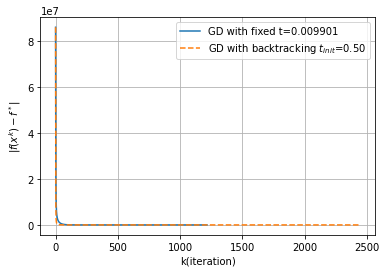

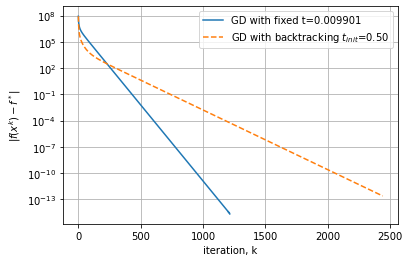

In [13]:
L=200
m=2
t=2/(L+m)
t_init=0.5

plt.figure(1)

print("fixed t=%f\t"%t, end='')
x_fixt,f_fixt=GD_fixt(x0, lambda x: grad_f(x,a,b),lambda x: f(x,a,b), t, max_iter=10000)
plt.plot(np.abs(f_fixt-f_opt))

print("backtrack t_init=%.2f\t"%t_init, end='')
x_bkt,f_bkt=GD_bt(x0, lambda x: grad_f(x,a,b), lambda x: f(x,a,b), t_init, max_iter=10000)
plt.plot(np.abs(f_bkt-f_opt),'--')
plt.grid() 
plt.ylabel("$|f(x^{k}) - f^*|$")
plt.xlabel("k(iteration)")
plt.legend(["GD with fixed t=%f" % t, "GD with backtracking $t_{init}$=%.2f" % t_init]);

plt.figure(2)

print("fixed t=%f\t"%t, end='')
x_fixt,f_fixt=GD_fixt(x0, lambda x: grad_f(x,a,b),lambda x: f(x,a,b), t, max_iter=10000)
plt.semilogy(np.abs(f_fixt-f_opt))

print("backtrack t_init=%.2f\t"%t_init, end='')
x_bkt,f_bkt=GD_bt(x0, lambda x: grad_f(x,a,b), lambda x: f(x,a,b), t_init, max_iter=10000)
plt.semilogy(np.abs(f_bkt-f_opt),'--')
plt.grid()  
plt.ylabel("$|f(x^{k}) - f^*|$")
plt.xlabel("iteration, k")
plt.legend(["GD with fixed t=%f" % t, "GD with backtracking $t_{init}$=%.2f" % t_init]);

# Comparison:
### Gradient Descent with fixed step size

As we can see from the above results, in this case the Gradient Descent algorithm with fixed step size converges, but takes many more iterations than  part **3)** because **Higher condition number $\frac{L}{m}$ $\implies$ Slower convergence rate.** 
$$$$
So, as we know the convergence rate is $O(\frac{L}{m}log(1/ε))= O(100log(1/ε))$ 

### Gradient Descent with Backtracking with diminishing step size
Again the choice of the initial step size is not critical. The algorithm converges exponentially, even if it requires more iteration then the standard gradient descent with fixed step size.

______________________________________________________

# Problem 2

At first, we consider **the minimisation primal problem** as below:

$$  \min_{x}\quad f(x_1,x_2,...,x_m) = \sum_{i=1}^{m} a_1\cdot(x_i-b_i)^2 + 3 $$
$$\textit{s.t.}  \quad \sum_{i=0}^{m} x_i \leq 100 $$
$$$$
$$   x_i \geq 0, \forall i\ge 1 $$

$$$$
Then, We try to apply **Lagrangian method** with the lagrange multipliers $\lambda$:

In general, we have:$\quad$ $\mathcal{L} (x,\lambda)= f(x) - \lambda g(x)$ where  $x=(x_1, ... , x_m)$ and $\lambda=(\lambda_0,\lambda_1, ..., \lambda_{m})$ 

Here $\lambda$ has $m+1$ values: $\lambda=(\lambda_1, ..., \lambda_{m})$ is associatd with the constraints on $   x_i \geq 0, \forall i $ and $\lambda_0$ is associated with the constraint on $\sum_{i=0}^{m} x_i \leq 100 $.
$$$$
So, $g_{i}(x)=-x, \forall i \in (1,...,m)  \leq 0 $ and $ g_{0}(x)=(\sum_{i=1}^{m} x_i) -100\leq 0 $. 
$$$$

Therefore, the **dual problem** is:


$$\max_{\lambda}{g(\lambda)} $$
$$\quad \textit{s.t.} \quad \lambda_i\ge0, \forall i\ge 1$$

where $g(\lambda)= \min_{x}{\mathcal{L} (x,\lambda)}$
$$$$
${\mathcal{L}(x,\lambda)} = f(x) +\lambda_0(\sum_{i=1}^{m} x_i -100)+ \lambda_i(-x)$ where $\forall i \in (1,...,m)$

## 1) KKT conditions

KKT conditions:

1. Stationarity
$$ \frac{\partial \mathcal{L}}{\partial x_i} = 2 a_i (x_i - b_i) +\lambda_0 - \lambda_i = 0$$

2. Complementary slackness

$$ \lambda_0\left(\sum_{i=1}^{m}{x_i} -100\right) = 0$$
$$ \lambda_i x_i =0,\, \forall i\ge 1$$

3. Primal feasibility
$$\sum_{i=1}^{m} x_i \le 100$$
$$-x_i \le 0, \forall i\ge 1$$



4. Dual feasibility
$$\lambda_i\ge0,\, \forall i\ge 1$$







## Solution
Following  above conditions, we want to some give insights on how to solve this problem.
$$$$
According to **Stationarity and complementary slackness** conditions: 

$2 a_i (x_i - b_i) +\lambda_0 - \lambda_i = 0  \implies  x_i =  \frac{\lambda_i-\lambda_0}{2 a_i}+ b_i$
$$$$
We have $ \lambda_i x_i =0,\, \forall i\ge 1$, so:
$$$$
$\textit{if} \quad  x_i\neq 0 \implies \lambda_i = 0 $ :
$$x_i =  \frac{-\lambda_0}{2 a_i}+ b_i$$
We also have $ x_i > 0 $, we have $ \frac{-\lambda_0}{2 a_i}+ b_i = x_i > 0 \implies \lambda_0< 2 a_i b_i $

---

$\textit{if} \quad \lambda_i \neq  0  \implies x_i=0 $ :
$$\lambda_i =  -2 a_i b_i +\lambda_0$$
$$$$
We also have $ \lambda_i > 0 $, we have $ -2 a_i b_i +\lambda_0 = \lambda_i > 0 \implies \lambda_0> 2 a_i b_i $

---

We got $x_i = max(0, \frac{-\lambda_0}{2a_i}+b_i)$

---
On the other hand, according to $\lambda_0 (\sum_{i=1}^{m} x_i - 100) = 0$ implies that either $\lambda_0 = 0$ or $\sum_{i=1}^{m} x_i - 100=0$

$\textit{if}\quad\lambda_0 = 0$ then $x_i=\frac{\lambda_i}{2 a_i}+ b_i$.

$\textit{if}\quad\sum_{i=1}^{m} x_i - 100=0$ then $\sum_{i=1}^{m}\frac{\lambda_i-\lambda_0}{2 a_i}+ b_i = 100$
$$$$
So, $\sum_{i=1}^{m}{\lambda_i-\lambda_0} = \frac{100-\sum_{i=1}^{m}b_i}{\sum_{i=1}^{m}\frac{1}{2a_ib_i}}$
$$$$
Thus $x_i=b_i+\frac{\frac{100-\sum_{i=1}^{m}b_i}{\sum_{i=1}^{m}\frac{1}{2a_ib_i}}}{2a_ib_i}, \forall i$




## Solution
Assume again that m = 500, and pick both ai and bi uniformly in [1, 100].

In [14]:
f = lambda x,a,b: np.sum(a*((x-b)**2))+3

In [15]:
np.random.seed(1)

In [16]:
m=500
a=np.random.randint(1,100+1, size=m)
b=np.random.randint(1,100+1, size=m)

## 2) Dual ascent
After deriving analytical expression of g($\lambda$), we try to solve a minimisation problem with **dual ascent algorithm** based on its dual form.

Our optimization problem can be considered in matrix form as

$$\min_{x}{f(x)} \quad \textit{st} \quad  Cx \le d $$

where $C$ is a matrix $(m+1, m)$ and $d$ is a $(m+1, 1)$ vector, associated with the constraint reported above.


In particular the first row of C is full of ones to represent the constraint $\sum_{i} x_i \le 100$, while the other $m$ rows have $-1$ on the diagonal, and represent the constraints $-x_i \le 0, \forall i \ge 1$.
$$$$
$d$ is instead formed by putting $100$ in the first row and $0$ elsewhere. 

\begin{equation}
\mathbf{C} = \begin{bmatrix}
1 & 1 & \dots & 1\\\ 
-1 & 0 & \dots & 0\\\ 
0 & -1 & \dots & 0\\\ 
\vdots & \ddots & \ddots & \vdots\\\ 
0 & 0 & \dots & -1
\end{bmatrix},
\qquad
\mathbf{d} = \begin{bmatrix}
100\\\ 
0\\\ 
0\\\ 
\vdots\\\ 
0
\end{bmatrix}.
\end{equation}

In [17]:
C=np.concatenate([np.ones((1,m)),-np.eye(m)],axis=0)
d=np.zeros(m+1, dtype=np.float64)
d[0]=100

We know if $f$ is strongly convex with parameter $m$, then **dual gradient ascent** with step sizes with constant step sizes $t_k = m$ converges at sublinear rate $O(\frac{1}{\epsilon})$
$$$$
According to what we got for  $L$ and $m$ (for simpilicity $L=1/m$ and $m=2$), the step size should be:

$$
t=L=0.5
$$
$$$$

Essentially the dual ascent algorithm works by doing **gradient ascent** on the dual variable $\lambda$ and updating at each iteration the value $x$ by solving a minimisation problem.

$$
x^{k+1}= arg min_x(\mathcal{L}(x^{k}, \lambda^{k}))= argmin_{x}{(f(x) + (\lambda ^k)^T C x)}$$
and
$$
\lambda^{k+1}=max(\lambda^k+t_k ( A x^{k+1} -b),0)
$$

For our case we can derive a closed form for the argmin, by simply computing the gradient and setting it equal to 0:

$$ 
\nabla [f(x) + (\lambda ^k)^T (C x-d)]=0 \implies \nabla f(x) + (\lambda ^k)^T C  =0
$$
therefore
$$
2 a_i (x_i - b_i) +(\lambda ^k)^T C_i =0 \implies x_i=b_i - \frac{(\lambda ^k)^T C_i}{2a_i}
$$


Indeed for the gradient dual ascent in the variable $u$,  $\nabla g(u)=C x -d$ s.t. $Cx -d \le 0$ 

A reasonable choice seems to check the difference of the function we want to minimise ($f(x)$) with respect its value in the previous iteration: if the function is not changing we stop the execution. Therefore the stopping condition is $|f(x_{k})- f(x_{k-1})|<\epsilon$.
$$$$
For the **stopping criterion**, a maximum number of iterations is chosen with respect to a variable $\epsilon=10^{−4}$, which is 
$$ max\_iter=  \frac{1}{\epsilon} = 10000$$

In [18]:
argmin_f=lambda u: np.maximum(b-(u@C)/(2*a),0)

In [19]:
def dual_ascent(u0, argmin, fun, t, C, d, eps=1e-4, max_iter=10000):
    assert(u0.shape[0]==C.shape[0]==d.shape[0])
    n_var,n_con=C.shape[1], u0.size
    
    x=np.empty(n_var, dtype=np.float64)
    u=np.empty(n_con, dtype=np.float64)
    f=np.empty(max_iter, dtype=np.float64)
    
    u=u0.copy()
    
    for k in range(max_iter-1):
        
        # solve argmin problem
        x=argmin(u)
        f[k]=fun(x)
        
        if  np.abs(f[k]-f[k-1]) < eps:
            print("converged after %d iterations" % k)
            break

        #update u

        u=np.maximum(u+t*(C@x-d),0)
        
    else: 
        k=max_iter-1
        x=argmin(u)
        f[k]=fun(x)

        print("stopped since reached max_iter")
        
    
    return x, f[:k+1]

In [20]:
u0=np.ones(m+1)

In [21]:
t=0.5

In [22]:
x_da,f_da=dual_ascent(u0, argmin_f ,lambda x: f(x,a,b), t, C, d, max_iter=10000, eps=1e-4)

converged after 615 iterations


Here, we try to solve the problem using **scipy.optimize**, then, we will use the opimal value to evluate the optimisation algorithms.

In [23]:
from scipy.optimize import LinearConstraint, minimize

min_sol=minimize(lambda x: np.sqrt(f(x,a,b)),np.ones(m), constraints=LinearConstraint(C,-np.inf, d))
f_opt=f(min_sol.x, a,b)
min_sol.success, min_sol.message, f_opt

(True, 'Optimization terminated successfully', 80630285.2505914)

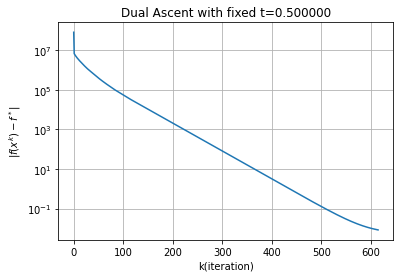

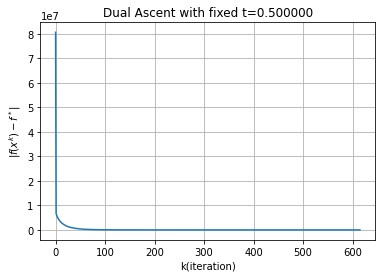

In [24]:
plt.figure(1)

plt.semilogy(np.abs(f_da-f_opt))

plt.ylabel("$|f(x^{k}) - f^*|$")
plt.xlabel("k(iteration)");
plt.title("Dual Ascent with fixed t=%f" % t);
plt.grid()

plt.figure(2)

plt.plot(np.abs(f_da-f_opt))

plt.ylabel("$|f(x^{k}) - f^*|$")
plt.xlabel("k(iteration)");
plt.title("Dual Ascent with fixed t=%f" % t);
plt.grid()

In [25]:
print("sum(x_i) =\t\t %.5f" % np.sum(x_da), "\n# - x_i =\t",np.sum(x_da<0))

sum(x_i) =		 100.00000 
# - x_i =	 0


## 3) Could the solution be parallelized?

The solution can be parallelised using **dual decomposition**. Indeed since the function $f(x_1, x_2, ..., x_m)= \sum_{i=1}^{m} a_i(x_i-b_i)^2 + 3$ to minimise given by the summation of $m$ terms of $f_i(x_i)$ that depends only on one variable $x_i$.

This allows to split the argmin problem like follows:
$$ x^{k+1}= argmin_{x}{(f(x) + (u ^k)^T C x)} \iff x^{k+1}_i= argmin_{x_i}{(f_i(x_i) + (u ^k)^T C_i x_i)} $$

In this way, we don't reduce the number of iterations required, because after each iteration we still need to gather all the $x_i$ and compute the updated $u^{k}$.

Anyway this decomposition can speed up the execution time, since we can run argmin problems in parallel with seperate processors so each iteration costs less time.